In [49]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.feature_selection import SelectKBest, chi2
import warnings
warnings.filterwarnings('ignore')

In [50]:
df = pd.read_csv("personality_dataset.csv")

In [51]:
df.sample(100)

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
314,0.0,No,3.0,7.0,No,6.0,3.0,Extrovert
1710,7.0,Yes,0.0,0.0,Yes,1.0,0.0,Introvert
1267,9.0,Yes,0.0,0.0,Yes,3.0,2.0,Introvert
1196,6.0,Yes,2.0,2.0,Yes,0.0,2.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
...,...,...,...,...,...,...,...,...
979,1.0,No,5.0,7.0,No,13.0,7.0,Extrovert
677,3.0,No,6.0,5.0,No,6.0,8.0,Extrovert
819,NaN,Yes,2.0,1.0,Yes,5.0,1.0,Introvert
499,3.0,No,6.0,7.0,No,12.0,4.0,Extrovert


In [52]:
df.shape

(2900, 8)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [54]:
df.duplicated().sum()

388

In [55]:
df.drop_duplicates(inplace=True)

In [56]:
df.duplicated().sum()

0

In [57]:
df.isnull().sum()

Time_spent_Alone             61
Stage_fear                   73
Social_event_attendance      61
Going_outside                65
Drained_after_socializing    51
Friends_circle_size          75
Post_frequency               63
Personality                   0
dtype: int64

In [58]:
# select featur columns and targeg column
num_features = ['Time_spent_Alone','Social_event_attendance','Going_outside',  'Friends_circle_size','Post_frequency']
cat_features = ['Stage_fear','Drained_after_socializing']
#cat_features = df.select_dtypes(include= "object")
target_col = 'Personality'

# Numerical Imputation

In [59]:
bold_start = "\033[1m"
bold_end = "\033[0m"

print(f"{bold_start}Numerica Missing Value{bold_end}")
for col in num_features:
    print(f"{col} : {df[col].isnull().sum()}")
 

Numerica Missing Value
Time_spent_Alone : 61
Social_event_attendance : 61
Going_outside : 65
Friends_circle_size : 75
Post_frequency : 63


In [60]:
#Missing values imputation usin mean
df.fillna(df.mean(numeric_only=True), inplace=True)

In [61]:
df[num_features].isnull().sum()

Time_spent_Alone           0
Social_event_attendance    0
Going_outside              0
Friends_circle_size        0
Post_frequency             0
dtype: int64

# Categorical Imputation

In [62]:
df['Stage_fear'].unique()

array(['No', 'Yes', nan], dtype=object)

In [63]:
df['Drained_after_socializing'].unique()

array(['No', 'Yes', nan], dtype=object)

In [64]:
df[cat_features].isnull().sum()

Stage_fear                   73
Drained_after_socializing    51
dtype: int64

In [65]:
df.isnull().mean()*100

Time_spent_Alone             0.000000
Stage_fear                   2.906051
Social_event_attendance      0.000000
Going_outside                0.000000
Drained_after_socializing    2.030255
Friends_circle_size          0.000000
Post_frequency               0.000000
Personality                  0.000000
dtype: float64

In [66]:
df['Stage_fear'].isnull().mean()*100

2.906050955414013

In [67]:
df['Stage_fear'].value_counts()

Stage_fear
No     1348
Yes    1091
Name: count, dtype: int64

<Axes: xlabel='Stage_fear'>

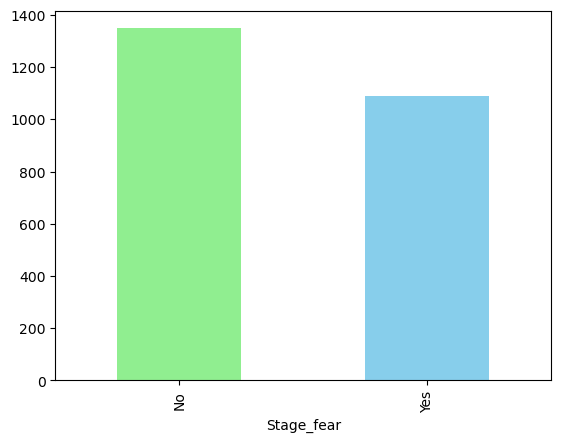

In [68]:
colors = ['lightgreen', 'skyblue','red', 'purple', 'orange']
df['Stage_fear'].value_counts().plot(kind='bar',color=colors)
#df['Stage_fear'].value_counts().plot(kind='bar', colormap='viridis')

In [69]:
df['Stage_fear'].mode()

0    No
Name: Stage_fear, dtype: object

## Category Column  before imputation Grpah 

Text(0.5, 1.0, 'Stage_fear')

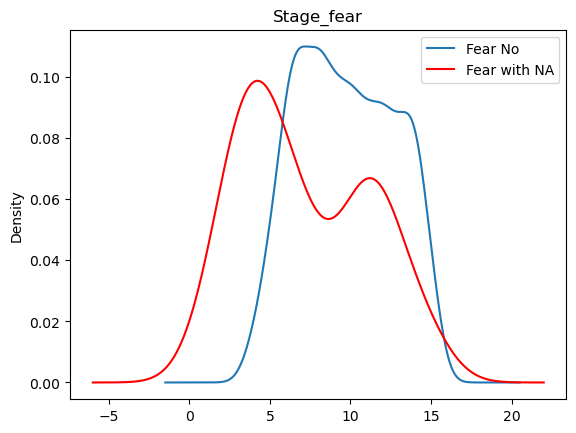

In [70]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['Stage_fear']=='No']['Friends_circle_size'].plot(kind='kde', ax=ax)

df[df['Stage_fear'].isnull()]['Friends_circle_size'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Fear No', 'Fear with NA']
ax.legend(lines, labels, loc='best')

plt.title('Stage_fear')

In [71]:
temp = df[df['Stage_fear']=='No']['Friends_circle_size']

## Category Column  After imputation Grpah 

In [72]:
df['Stage_fear'].value_counts()

Stage_fear
No     1348
Yes    1091
Name: count, dtype: int64

In [73]:
# Assuming df is your DataFrame  
null_mask = df['Stage_fear'].isnull()  
n_missing = null_mask.sum()  

# Randomly sample from existing categories (weighted by their counts)  
random_imputation = np.random.choice(
    ['No', 'Yes'], 
    size=n_missing, 
    p=[1417/(1417+1410), 1410/(1417+1410)]  # Probabilities based on observed frequencies
)  
# Fill missing values  
df.loc[null_mask, 'Stage_fear'] = random_imputation  

# Verify counts  
print(df['Stage_fear'].value_counts())  

Stage_fear
No     1387
Yes    1125
Name: count, dtype: int64


In [74]:
df['Stage_fear'].isnull().sum()

0

Text(0.5, 1.0, 'Stage_fear')

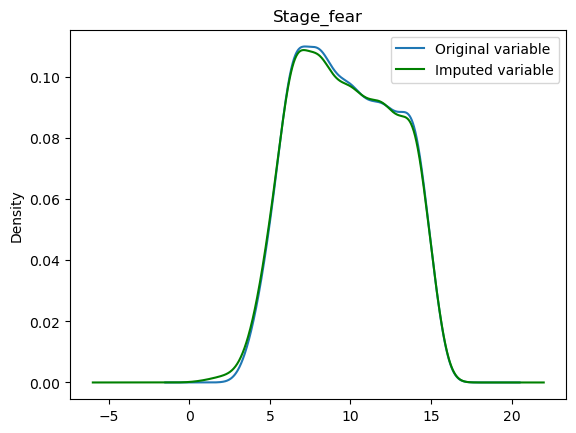

In [75]:
fig = plt.figure()
ax = fig.add_subplot(111)


temp.plot(kind='kde', ax=ax)
#temp2.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
df[df['Stage_fear'] == 'No']['Friends_circle_size'].plot(kind='kde', ax=ax, color='green')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('Stage_fear')

In [76]:
df['Drained_after_socializing'].unique()

array(['No', 'Yes', nan], dtype=object)

In [77]:
df[cat_features].isnull().sum()

Stage_fear                    0
Drained_after_socializing    51
dtype: int64

In [78]:
df['Drained_after_socializing'].isnull().mean()*100

2.0302547770700636

In [79]:
df['Drained_after_socializing'].value_counts()

Drained_after_socializing
No     1372
Yes    1089
Name: count, dtype: int64

<Axes: xlabel='Drained_after_socializing'>

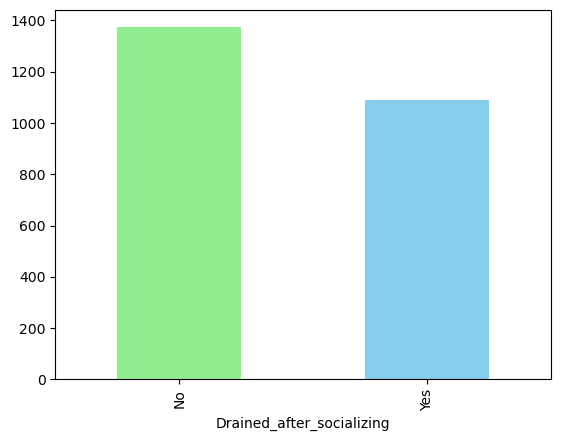

In [80]:
colors = ['lightgreen', 'skyblue','red', 'purple', 'orange']
df['Drained_after_socializing'].value_counts().plot(kind='bar',color=colors)
#df['Stage_fear'].value_counts().plot(kind='bar', colormap='viridis')

Text(0.5, 1.0, 'Drained_after_socializing')

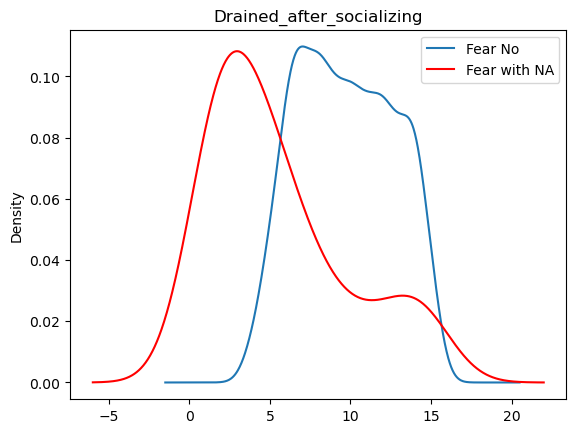

In [81]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['Drained_after_socializing']=='No']['Friends_circle_size'].plot(kind='kde', ax=ax)

df[df['Drained_after_socializing'].isnull()]['Friends_circle_size'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Fear No', 'Fear with NA']
ax.legend(lines, labels, loc='best')

plt.title('Drained_after_socializing')

In [82]:
temp = df[df['Drained_after_socializing']=='No']['Friends_circle_size']

In [83]:
df['Drained_after_socializing'].value_counts()

Drained_after_socializing
No     1372
Yes    1089
Name: count, dtype: int64

In [84]:
# Assuming df is your DataFrame  
null_mask = df['Drained_after_socializing'].isnull()  
n_missing = null_mask.sum()  

# Randomly sample from existing categories (weighted by their counts)  
random_imputation = np.random.choice(
    ['No', 'Yes'], 
    size=n_missing, 
    p=[1372/(1372+1089), 1089/(1372+1089)]  # Probabilities based on observed frequencies
)  
# Fill missing values  
df.loc[null_mask, 'Drained_after_socializing'] = random_imputation  

# Verify counts  
print(df['Drained_after_socializing'].value_counts())  

Drained_after_socializing
No     1404
Yes    1108
Name: count, dtype: int64


Text(0.5, 1.0, 'Stage_fear')

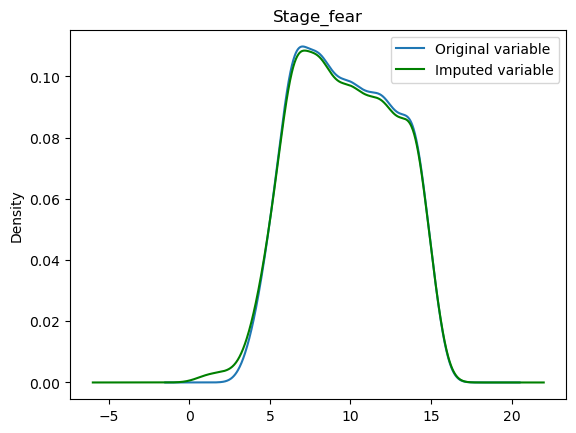

In [85]:
fig = plt.figure()
ax = fig.add_subplot(111)


temp.plot(kind='kde', ax=ax)
#temp2.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
df[df['Drained_after_socializing'] == 'No']['Friends_circle_size'].plot(kind='kde', ax=ax, color='green')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('Stage_fear')

In [86]:
mapping = {'No': 0, 'Yes': 1}
personality_map = {
    'Introvert': 0,
    'Extrovert': 1
}

df['Stage_fear'] = df['Stage_fear'].map(mapping)
df['Drained_after_socializing'] = df['Drained_after_socializing'].map(mapping)
df['Personality'] = df['Personality'].map(personality_map)

In [87]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,0,4.0,6.0,0,13.0,5.0,1
1,9.0,1,0.0,0.0,1,0.0,3.0,0
2,9.0,1,1.0,2.0,1,5.0,2.0,0
3,0.0,0,6.0,7.0,0,14.0,8.0,1
4,3.0,0,9.0,4.0,0,8.0,5.0,1


In [88]:
 scaler = StandardScaler()
df[num_features] = scaler.fit_transform(df[num_features])

In [89]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,-0.061497,0,-0.076262,1.261784,0,1.501153,0.401335,1
1,1.407602,1,-1.468569,-1.445833,1,-1.551548,-0.285506,0
2,1.407602,1,-1.120492,-0.543294,1,-0.377432,-0.628927,0
3,-1.236776,0,0.619892,1.713054,0,1.735976,1.431598,1
4,-0.355317,0,1.664123,0.359245,0,0.327037,0.401335,1


In [90]:
df.isnull().sum()

Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

In [91]:
df.corr()["Personality"].drop("Personality")

Time_spent_Alone            -0.699726
Stage_fear                  -0.829166
Social_event_attendance      0.697663
Going_outside                0.713393
Drained_after_socializing   -0.832710
Friends_circle_size          0.662021
Post_frequency               0.693814
Name: Personality, dtype: float64

In [92]:
df['Personality'] = df['Personality'].astype(str)

features = [
    'Time_spent_Alone',
    'Stage_fear',
    'Social_event_attendance',
    'Going_outside',
    'Drained_after_socializing',
    'Friends_circle_size',
    'Post_frequency'
]

In [94]:
le = LabelEncoder()
y = le.fit_transform(df['Personality'])

X = df.drop(columns = ['Personality'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature selection
### k_best = SelectKBest(score_func=chi2, k=20)
### X_train_selected = k_best.fit_transform(X_train, y_train)
### X_test_selected = k_best.transform(X_test)


In [95]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)

print("Logistic Regression:\n", classification_report(y_test, log_pred, target_names=le.classes_))

Logistic Regression:
               precision    recall  f1-score   support

           0       0.92      0.91      0.91       221
           1       0.93      0.94      0.93       282

    accuracy                           0.92       503
   macro avg       0.92      0.92      0.92       503
weighted avg       0.92      0.92      0.92       503



In [96]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

print("Random Forest:\n", classification_report(y_test, rf_pred, target_names=le.classes_))

Random Forest:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89       221
           1       0.91      0.91      0.91       282

    accuracy                           0.90       503
   macro avg       0.90      0.90      0.90       503
weighted avg       0.90      0.90      0.90       503



In [97]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

print("Gradient Boosting:\n", classification_report(y_test, gb_pred, target_names=le.classes_))


Gradient Boosting:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92       221
           1       0.94      0.94      0.94       282

    accuracy                           0.93       503
   macro avg       0.93      0.93      0.93       503
weighted avg       0.93      0.93      0.93       503



In [98]:
print("Model Accuracy Summary:")
print("Logistic Regression:", accuracy_score(y_test, log_pred))
print("Random Forest:", accuracy_score(y_test, rf_pred))
print("Gradient Boosting:", accuracy_score(y_test, gb_pred))
##print("XGBoost:", accuracy_score(y_test, xgb_pred))
##print("LightGBM:", accuracy_score(y_test, lgbm_pred))

Model Accuracy Summary:
Logistic Regression: 0.9244532803180915
Random Forest: 0.9025844930417495
Gradient Boosting: 0.9324055666003976
